<a href="https://colab.research.google.com/github/siddh1990/Projects/blob/main/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ini_comp=190
breakdown_prob=0.06
prob_major=0.3
CST_major=2.75
CST_minor=0.75
Max_hrs_CST=6
CST_daily_cost=300
Outside_firm_per_hr=120
Delivery_cost=80
oppor_cost=250
col=["CST No.","Mean","Median"]
Result=pd.DataFrame(columns=col)
table=np.zeros(shape=(4,3))

In [ ]:
Scenario=[1,2,3,4]

   Number od CST      Mean    Median
0            1.0  303102.0  302650.0
1            2.0  182004.0  181725.0
2            3.0  124320.0  124035.0
3            4.0  125784.0  125505.0


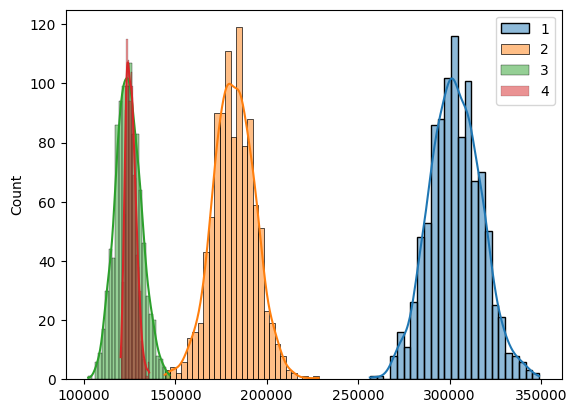

In [ ]:
for i in Scenario:
  val=[]
  for b in range(0,1000):
    total_cost=0
    ini_comp=190
    a=[]
    cum_loss=0
    for j in range(0,100):
      Problem=np.random.binomial(ini_comp,breakdown_prob)
      Problem=int(Problem)
      Major=np.random.binomial(Problem,prob_major)
      Minor=Problem-int(Major)
      #print(i," ",j," ",Problem," ",Major," ",Minor)
      major_time=CST_major*Major
      minor_time=CST_minor*Minor
      total_time=major_time+ minor_time
      CST_total_time=i*Max_hrs_CST
      if(CST_total_time>=total_time):
        outside_firm_time=0
        comp_CST=Problem
      else:
        outside_firm_time=total_time-CST_total_time
        comp_CST=round(CST_total_time*Problem/(major_time+minor_time))
      comp_out=Problem-comp_CST
      a.append(comp_out)
      #print(i," ",j," ",Problem," ",Major," ",Minor," ",total_time," ",comp_CST," ", outside_firm_time," ",a[j])
      CST_salaries=CST_daily_cost*i
      outside_firm_cost=Outside_firm_per_hr*outside_firm_time
      end_comp=ini_comp-comp_out
      oppor_loss=(190-ini_comp)*oppor_cost
      total_cost1=total_cost+ CST_salaries+outside_firm_cost+oppor_loss
      total_cost=total_cost1
      cum_loss=cum_loss+total_cost
      #print(i," ",j," ", total_cost)
      if(outside_firm_time>0):
        total_cost=80
      else:
        total_cost=0
      #print(i," ",j," ",Problem," ",Major," ",Minor," ",total_time," ",comp_CST," ", outside_firm_time," ",a[j]," ",ini_comp," ",end_comp," ",total_cost1," ",cum_loss)
      #print(i," ",j," ",total_cost1," ",cum_loss)
      if(j>0):
        j1=j-1
        ini_comp=end_comp+a[j1]
      else:
        ini_comp=end_comp

    val.append(cum_loss)
  table[i-1]=[round(i,0),round((np.array(val).mean()),0),round(np.median(np.array(val)),0)]
  sns.histplot(val,x=val,kde=True,legend=True,label=i)
  plt.legend()
table_frame=pd.DataFrame(table,columns=["Number od CST","Mean","Median"])
print(table_frame)

